# Statistics Code Along for Miss Chisom

In [1]:
import pandas as pd
import numpy as np
import gdown
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
file_id = '1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO'  # Make sure it's a string
gdown.download(f'https://drive.google.com/uc?id={file_id}', 'data.csv', quiet=False)


Downloading...
From: https://drive.google.com/uc?id=1yB5qSBOLl96Y563nIewKOU8RN_gsY3dO
To: c:\Users\ncc333\Desktop\DataAndDataAnalysis\Numpy\Class_Task6\data.csv
100%|██████████| 52.0k/52.0k [00:00<00:00, 339kB/s]


'data.csv'

In [3]:
df = pd.read_csv('data.csv')
df.head()

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96


In [4]:
from scipy import stats

In [5]:
df

,Unnamed: 0,country,food_category,consumption,co2_emission
0,1,Argentina,pork,10.51,37.20
1,2,Argentina,poultry,38.66,41.53
2,3,Argentina,beef,55.48,1712.00
3,4,Argentina,lamb_goat,1.56,54.63
4,5,Argentina,fish,4.36,6.96
...,...,...,...,...,...
1425,1426,Bangladesh,dairy,21.91,31.21
1426,1427,Bangladesh,wheat,17.47,3.33
1427,1428,Bangladesh,rice,171.73,219.76
1428,1429,Bangladesh,soybeans,0.61,0.27


In [ ]:
# df.drop('Unnamed: 0', axis=1, inplace=True)

In [28]:
df.describe(include='all')

,country,food_category,consumption,co2_emission
count,1430,1430,1430.000000,1430.000000
unique,130,11,NaN,NaN
top,Argentina,pork,NaN,NaN
freq,11,130,NaN,NaN
mean,NaN,NaN,28.110406,74.383993
std,NaN,NaN,49.818044,152.098566
min,NaN,NaN,0.000000,0.000000
25%,NaN,NaN,2.365000,5.210000
50%,NaN,NaN,8.890000,16.530000
75%,NaN,NaN,28.132500,62.597500


In [ ]:
be_consumption = df[df['country'] == 'Belgium'] #extracting all entries for Belgium
be_consumption

,country,food_category,consumption,co2_emission
396,Belgium,pork,38.65,136.80
397,Belgium,poultry,12.20,13.11
398,Belgium,beef,15.63,482.31
399,Belgium,lamb_goat,1.32,46.23
400,Belgium,fish,18.97,30.29
401,Belgium,eggs,12.59,11.57
402,Belgium,dairy,236.19,336.43
403,Belgium,wheat,111.91,21.34
404,Belgium,rice,8.61,11.02
405,Belgium,soybeans,0.07,0.03


In [31]:
#Calculating the mean and median consumption in Belgium
print(f"Mean consumption in Belgium: {np.mean(be_consumption['consumption'])}")
print(f"Median consumption in Belgium: {np.median(be_consumption['consumption'])}")

Mean consumption in Belgium: 42.13272727272727
Median consumption in Belgium: 12.59


In [32]:
#Filter for USA
usa_consumption = df[df['country'] == 'USA']
usa_consumption

,country,food_category,consumption,co2_emission
55,USA,pork,27.64,97.83
56,USA,poultry,50.01,53.72
57,USA,beef,36.24,1118.29
58,USA,lamb_goat,0.43,15.06
59,USA,fish,12.35,19.72
60,USA,eggs,14.58,13.39
61,USA,dairy,254.69,362.78
62,USA,wheat,80.43,15.34
63,USA,rice,6.88,8.80
64,USA,soybeans,0.04,0.02


In [38]:
print(f"Mean consumption in Belgium: {np.mean(usa_consumption['consumption'])}")
print(f"Mean consumption in Belgium: {np.median(usa_consumption['consumption'])}")

Mean consumption in Belgium: 44.650000000000006
Mean consumption in Belgium: 14.58


In [ ]:
df['country'].value_counts() #counts the number of times a particular entry shows up in the country column

country
Argentina       11
Australia       11
Albania         11
Iceland         11
New Zealand     11
                ..
Sierra Leone    11
Sri Lanka       11
Indonesia       11
Liberia         11
Bangladesh      11
Name: count, Length: 130, dtype: int64

In [46]:
#Checking the mode of the country column
mode_country = df['country'].mode()
print(f"Mode Country: \n{mode_country}")

Mode Country: 
0        Albania
1        Algeria
2         Angola
3      Argentina
4        Armenia
         ...    
125      Uruguay
126    Venezuela
127      Vietnam
128       Zambia
129     Zimbabwe
Name: country, Length: 130, dtype: object


## Measure of Spread

In [47]:
df

,country,food_category,consumption,co2_emission
0,Argentina,pork,10.51,37.20
1,Argentina,poultry,38.66,41.53
2,Argentina,beef,55.48,1712.00
3,Argentina,lamb_goat,1.56,54.63
4,Argentina,fish,4.36,6.96
...,...,...,...,...
1425,Bangladesh,dairy,21.91,31.21
1426,Bangladesh,wheat,17.47,3.33
1427,Bangladesh,rice,171.73,219.76
1428,Bangladesh,soybeans,0.61,0.27


In [ ]:
co2_min = df['co2_emission'].min()
co2_min

np.float64(0.0)

In [50]:
co2_max = df["co2_emission"].max()
co2_max

np.float64(1712.0)

In [51]:
co2_range = co2_max - co2_min
co2_range

np.float64(1712.0)

In [54]:
print(f"CO2 Emission variance: {df['co2_emission'].var()}")

CO2 Emission variance: 23133.97363855838


In [56]:
print(f"CO2 Emission standard deviation: {df['co2_emission'].std()}")

CO2 Emission standard deviation: 152.09856553747764


In [59]:
percentiles = df['co2_emission'].quantile([0.10, 0.25, 0.50, 0.75])
print(f"Percentiles \n{percentiles}")

Percentiles 
0.10     0.6680
0.25     5.2100
0.50    16.5300
0.75    62.5975
Name: co2_emission, dtype: float64


In [60]:
iqr = percentiles[0.75] - percentiles[0.25]
print(f"Interquartile range: {iqr}")

Interquartile range: 57.3875


### One-Sample t-Test

Question: Is the average beef consumption in Argentina significantly different from 50 kg/person/year?

H₀: Mean beef consumption in Argentina = 50

H₁: Mean beef consumption in Argentina ≠ 50

In [7]:
# Select Argentina beef consumption
arg_beef = df[(df["country"] == "Argentina") & (df["food_category"]=="beef")]
arg_beef

,country,food_category,consumption,co2_emission
2,Argentina,beef,55.48,1712.0


In [8]:
arg_consumption_mean = arg_beef["consumption"].mean()
arg_consumption_mean

np.float64(55.48)

In [9]:
#Creating samples around the mean
arg_beef_samples = np.random.normal(loc=arg_consumption_mean, scale=5, size=30) #creates a normal distribution of 30 numbers +-5 values around the mean
arg_beef_samples

array([49.78683244, 51.14418023, 57.14901683, 54.36487872, 63.92082202,
       57.48390764, 63.81002288, 57.02687252, 58.12294257, 61.76525477,
       64.32365017, 57.75244172, 55.42299556, 55.49909865, 48.93138431,
       58.00013515, 58.65889277, 58.77363641, 44.97764383, 55.42367453,
       41.44858752, 53.56614902, 46.97326579, 53.35690046, 53.53583364,
       55.15546685, 58.15161546, 56.67084759, 50.53251237, 47.58318833])

In [11]:
#One sample test
t_stat, p_val = stats.ttest_1samp(arg_beef_samples, 50)

In [12]:
print(f"T-statistic: {t_stat}")

T-statistic: 4.94381393477957


In [13]:
print(f"P-value: {p_val}")

P-value: 2.9653876510202786e-05


## Correlation Analysis

since p< 0.05, H₀ will be rejected, where H₀ → beef consumption differs significantly

Is there a relationship between food consumption and CO₂ emissions?
H₀: No correlation between consumption and CO₂ emission
H₁: There is a relationship correlation

In [14]:
corr, p_val = stats.pearsonr(df['consumption'], df["co2_emission"])

In [15]:
print(f"Coorelatioin Coefficient: {corr}")

Coorelatioin Coefficient: 0.334250704433365


In [16]:
print(f"P-Value: {p_val}")

P-Value: 1.1519382934888456e-38


Correlation coefficient (r):
close to zero: no relation

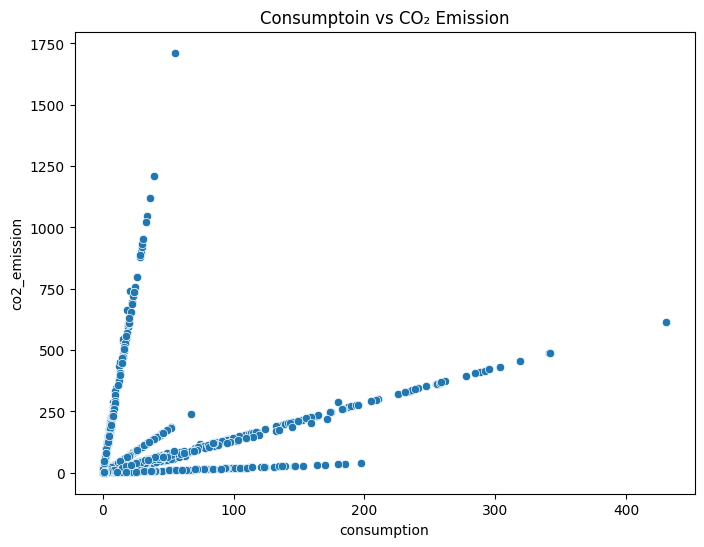

In [17]:
plt.figure(figsize=(8,6))
sns.scatterplot(x="consumption", y="co2_emission", data=df)
plt.title("Consumptoin vs CO₂ Emission")
plt.show()

Is the beef consumption in Argentina significantly different from that in Bangladesh?

H₀: Mean beef consumption (Argentina) = Mean beef consumption (Bangladesh)

H₁: Mean beef consumption (Argentina) ≠ Mean beef consumption (Bangladesh)

In [18]:
bang_beef = df[(df["country"] == "Bangladesh") & (df["food_category"]=="beef")]
bang_beef

,country,food_category,consumption,co2_emission
1421,Bangladesh,beef,1.28,39.5


In [19]:
bang_beef_mean = bang_beef["consumption"].mean()
print(f"Average beef consumption in Bangledesh: {bang_beef_mean}")

Average beef consumption in Bangledesh: 1.28


In [20]:
#Creating samples
bang_beef_samples = np.random.normal(loc=bang_beef_mean, scale=5, size=30)
bang_beef_samples

array([12.64362473,  0.36013127,  1.31810711, -0.15221269,  2.75382231,
        1.09315238,  2.19860655,  1.99640772, -9.15218599,  3.15080655,
        2.408306  ,  4.56080094, -4.64668886,  7.50390924, -6.68716157,
        2.51398552, -2.92094929,  2.67611867, -4.67828792, -1.14564078,
        1.96717882,  3.68952703,  5.56280299,  2.52589358,  4.66478918,
        4.61887559, -3.50762334, -4.64992993,  0.32384549,  4.50779655])

### Perforimng a two-tailed test

In [21]:
# Performing a two tailed test
t_statistic, p_val = stats.ttest_ind(bang_beef_samples, arg_beef_samples, alternative='two-sided')

In [22]:
print(f"T Statistic: {t_statistic} \nP-value: {p_val}")

T Statistic: -41.53310142708694 
P-value: 7.608965888915228e-45


In [23]:
critic=stats.t.isf(0.05/2,29)
critic

np.float64(2.0452296421327034)

From the two-tailed test, the absolute value of the t-statitics (40.163) > critical value (2.0452), therefore, the null hypothesis can be rejected and we can conclude that there is a significant difference between the mean beef consumption in Bangladesh and the mean beef consumption in Argentina

### Performing Correlation Analysis

In [24]:
#Checking the linear relationship
corr, p_val = stats.pearsonr(bang_beef_samples, arg_beef_samples)

In [25]:
print(f"Correlation Coefficient: {corr}")

Correlation Coefficient: -0.0419886899607557


Since correlation coefficient (r) is approximately -0.312, this indicates a weak negative linear relationship between the mean beef consumption in Argnetina and mean beef consumption in Argentina

In [26]:
print(f"P-values: {p_val}")

P-values: 0.8256327090616904


Since the p_value < 0.05 H₀ can be rejected, therefore, the beef consumption in Argentina is significantly different from the beef consumption in Bangladesh.

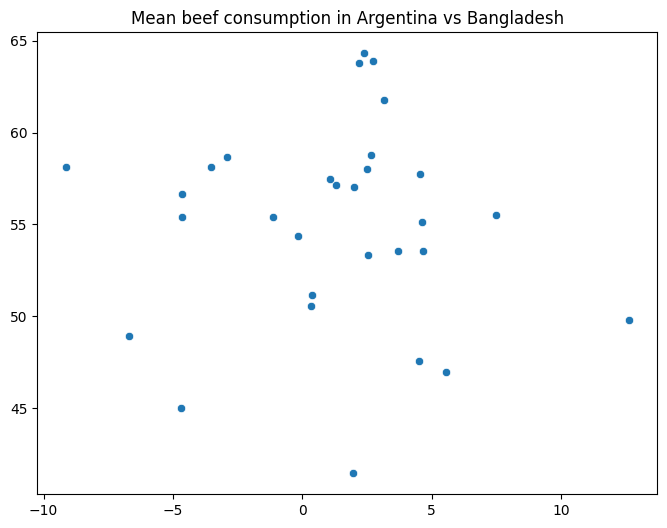

In [27]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=bang_beef_samples, y=arg_beef_samples)
plt.title("Mean beef consumption in Argentina vs Bangladesh")
plt.show()